<a href="https://colab.research.google.com/github/sujataprasad01/Cognizant-AI-Program-Project2/blob/main/Model_Building%26Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
sales_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cognizant Internship/4.1 sample_sales_data.csv")

In [3]:
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
stock_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cognizant Internship/4.3 sensor_stock_levels.csv")

In [5]:
stock_data.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
storage_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cognizant Internship/4.4 sensor_storage_temperature.csv")

In [7]:
storage_data.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [8]:
sales_data.drop(columns=["Unnamed: 0"], inplace=True)
stock_data.drop(columns=["Unnamed: 0"], inplace=True)
storage_data.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [10]:
stock_data.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [11]:
storage_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [12]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [14]:
storage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [15]:
storage_data["timestamp"]=pd.to_datetime(storage_data["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [16]:
storage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [17]:
storage_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [18]:
stock_data["timestamp"]=pd.to_datetime(storage_data["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [19]:
sales_data["timestamp"]=pd.to_datetime(storage_data["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [20]:
stock_data.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 15:55:20,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-01 09:18:22,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-04 15:12:26,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 12:30:42,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-05 09:09:33,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [21]:
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-07 15:55:20,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-01 09:18:22,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 15:12:26,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 12:30:42,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 09:09:33,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [22]:
from datetime import datetime

In [23]:
new_ts=[]
for i in sales_data["timestamp"]:
  new_ts.append(i.strftime('%Y-%m-%d %H:00:00'))

In [24]:
sales_data["timestamp"]=[datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]

In [25]:
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-07 15:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-01 09:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 15:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 12:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 09:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [26]:
new_ts=[]
for i in stock_data["timestamp"]:
  new_ts.append(i.strftime('%Y-%m-%d %H:00:00'))

stock_data["timestamp"]=[datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
stock_data.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 15:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-01 09:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-04 15:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 12:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-05 09:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [27]:
new_ts=[]
for i in storage_data["timestamp"]:
  new_ts.append(i.strftime('%Y-%m-%d %H:00:00'))

storage_data["timestamp"]=[datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
storage_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [28]:
sales_data['timestamp'].value_counts()

2022-03-07 12:00:00    121
2022-03-01 14:00:00    119
2022-03-03 12:00:00    118
2022-03-04 12:00:00    118
2022-03-06 19:00:00    117
                      ... 
2022-03-06 16:00:00     88
2022-03-07 10:00:00     87
2022-03-06 09:00:00     86
2022-03-05 13:00:00     84
2022-03-06 11:00:00     78
Name: timestamp, Length: 77, dtype: int64

In [29]:
sales_agg = sales_data.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()

In [30]:
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,5
2,2022-03-01 09:00:00,02b1a5a2-cd74-4e64-80f0-4667372bc394,7
3,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,4
4,2022-03-01 09:00:00,04f3ad3d-83ab-47e8-925b-3383055489f2,4


In [31]:
stock_agg = stock_data.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115


In [32]:
storage_agg = storage_data.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
storage_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


In [33]:
merged_data = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,NaN
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,NaN
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,NaN


In [34]:
merged_data = merged_data.merge(storage_agg, on='timestamp', how='left')
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,NaN,-0.02885
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,NaN,-0.02885
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,NaN,-0.02885


In [35]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10904 non-null  datetime64[ns]
 1   product_id           10904 non-null  object        
 2   estimated_stock_pct  10904 non-null  float64       
 3   quantity             3070 non-null   float64       
 4   temperature          10904 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 511.1+ KB


In [36]:
merged_data['quantity'] = merged_data['quantity'].fillna(0)

In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10904 non-null  datetime64[ns]
 1   product_id           10904 non-null  object        
 2   estimated_stock_pct  10904 non-null  float64       
 3   quantity             10904 non-null  float64       
 4   temperature          10904 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 511.1+ KB


In [38]:
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-07 15:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-01 09:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 15:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 12:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 09:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [39]:
product_categories = sales_data[['product_id', 'category']]

In [40]:
product_categories.head()

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit


In [41]:
product_categories.duplicated().sum()

7529

In [42]:
product_categories = product_categories.drop_duplicates()

In [43]:
product_categories.head()

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit


In [44]:
product_categories.duplicated().sum()

0

In [45]:
product_price = sales_data[['product_id', 'unit_price']]

In [46]:
product_price.head()

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49


In [47]:
product_price.duplicated().sum()

7529

In [48]:
product_price = product_price.drop_duplicates()

In [49]:
product_price.head()

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49


In [50]:
merged_data=merged_data.merge(product_categories, on="product_id", how="left")

In [51]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,0.0,-0.02885,canned foods


In [52]:
merged_data=merged_data.merge(product_price, on="product_id", how="left")

In [53]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets,8.19
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,0.0,-0.02885,canned foods,2.49


In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10904 non-null  datetime64[ns]
 1   product_id           10904 non-null  object        
 2   estimated_stock_pct  10904 non-null  float64       
 3   quantity             10904 non-null  float64       
 4   temperature          10904 non-null  float64       
 5   category             10904 non-null  object        
 6   unit_price           10904 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 681.5+ KB


# Feature Engineering

In [55]:
merged_data['timestamp_monthDay']=merged_data['timestamp'].dt.day

In [56]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_monthDay
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen,11.19,1
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0,-0.02885,vegetables,1.49,1
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products,14.19,1
3,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets,8.19,1
4,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,0.0,-0.02885,canned foods,2.49,1


In [57]:
merged_data['timestamp_weekDay']=merged_data['timestamp'].dt.day_of_week

In [58]:
merged_data['timestamp_hour']=merged_data['timestamp'].dt.hour

In [59]:
merged_data.drop(columns=['timestamp'], inplace=True)

In [60]:
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_monthDay,timestamp_weekDay,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,baby products,14.19,1,1,9
3,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,pets,8.19,1,1,9
4,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,0.0,-0.02885,canned foods,2.49,1,1,9


In [61]:
merged_data['category'].value_counts()

beverages                564
frozen                   544
snacks                   542
condiments and sauces    531
refrigerated items       526
cleaning products        525
baking                   518
medicine                 517
baked goods              516
personal care            505
baby products            492
cheese                   491
seafood                  490
vegetables               490
spices and herbs         485
canned foods             472
fruit                    471
meat                     467
packaged foods           452
kitchen                  452
dairy                    437
pets                     417
Name: category, dtype: int64

In [62]:
merged_data=pd.get_dummies(merged_data, columns=['category'])

In [63]:
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_monthDay,timestamp_weekDay,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.310,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.700,5.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.480,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.710,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0
4,049b2171-0eeb-4a3e-bf98-0c290c7821da,0.115,0.0,-0.02885,2.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10904 entries, 0 to 10903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10904 non-null  object 
 1   estimated_stock_pct             10904 non-null  float64
 2   quantity                        10904 non-null  float64
 3   temperature                     10904 non-null  float64
 4   unit_price                      10904 non-null  float64
 5   timestamp_monthDay              10904 non-null  int64  
 6   timestamp_weekDay               10904 non-null  int64  
 7   timestamp_hour                  10904 non-null  int64  
 8   category_baby products          10904 non-null  uint8  
 9   category_baked goods            10904 non-null  uint8  
 10  category_baking                 10904 non-null  uint8  
 11  category_beverages              10904 non-null  uint8  
 12  category_canned foods           

In [65]:
merged_data.drop(columns=['product_id'], inplace=True)

In [66]:
merged_data.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_monthDay,timestamp_weekDay,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.310,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.700,5.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.480,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.710,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.115,0.0,-0.02885,2.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning

# splitting the data

In [67]:
X=merged_data.drop(columns=['estimated_stock_pct'])

In [68]:
y=merged_data['estimated_stock_pct']

In [69]:
X.head()

,quantity,temperature,unit_price,timestamp_monthDay,timestamp_weekDay,timestamp_hour,category_baby products,category_baked goods,category_baking,category_beverages,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,3.0,-0.02885,11.19,1,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,-0.02885,1.49,1,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-0.02885,14.19,1,1,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,-0.02885,8.19,1,1,9,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,-0.02885,2.49,1,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y.head()

0    0.310
1    0.700
2    0.480
3    0.710
4    0.115
Name: estimated_stock_pct, dtype: float64

In [71]:
X.shape

(10904, 28)

In [72]:
y.shape

(10904,)

# train and test splitting

In [73]:
k=10
split=0.75

# RandomForestRegression

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=split, random_state=42)

In [80]:
model=RandomForestRegressor()

# Preprocessing

In [81]:
preprocessing=StandardScaler()

In [82]:
preprocessing.fit(X_train)

StandardScaler()

In [83]:
X_train = preprocessing.transform(X_train)
X_test = preprocessing.transform(X_test)

In [84]:
trained_model = model.fit(X_train, y_train)

In [91]:
trained_model

RandomForestRegressor()

# Testing the model

In [85]:
y_pred=trained_model.predict(X_test)

In [92]:
y_pred

array([0.38611667, 0.76785   , 0.53725   , ..., 0.52622778, 0.64376667,
       0.40862333])

In [86]:
mae=mean_absolute_error(y_test,y_pred)

In [87]:
mae

0.23619921779833233

In [89]:
avg_mae = np.mean(mae)

In [90]:
avg_mae

0.23619921779833233

In [101]:
features = [i.split("__")[0] for i in X.columns]

In [102]:
importances = model.feature_importances_
indices = np.argsort(importances)

([<matplotlib.axis.YTick at 0x7f1a521ecf70>,
 [Text(0, 0, 'category_fruit'),
  Text(0, 1, 'category_vegetables'),
  Text(0, 2, 'category_meat'),
  Text(0, 3, 'category_medicine'),
  Text(0, 4, 'category_kitchen'),
  Text(0, 5, 'category_snacks'),
  Text(0, 6, 'category_dairy'),
  Text(0, 7, 'category_pets'),
  Text(0, 8, 'category_condiments and sauces'),
  Text(0, 9, 'category_baby products'),
  Text(0, 10, 'category_canned foods'),
  Text(0, 11, 'category_spices and herbs'),
  Text(0, 12, 'category_seafood'),
  Text(0, 13, 'category_packaged foods'),
  Text(0, 14, 'category_baking'),
  Text(0, 15, 'category_refrigerated items'),
  Text(0, 16, 'category_cheese'),
  Text(0, 17, 'category_cleaning products'),
  Text(0, 18, 'category_personal care'),
  Text(0, 19, 'category_beverages'),
  Text(0, 20, 'category_baked goods'),
  Text(0, 21, 'category_frozen'),
  Text(0, 22, 'timestamp_weekDay'),
  Text(0, 23, 'timestamp_monthDay'),
  Text(0, 24, 'quantity'),
  Text(0, 25, 'timestamp_hour')

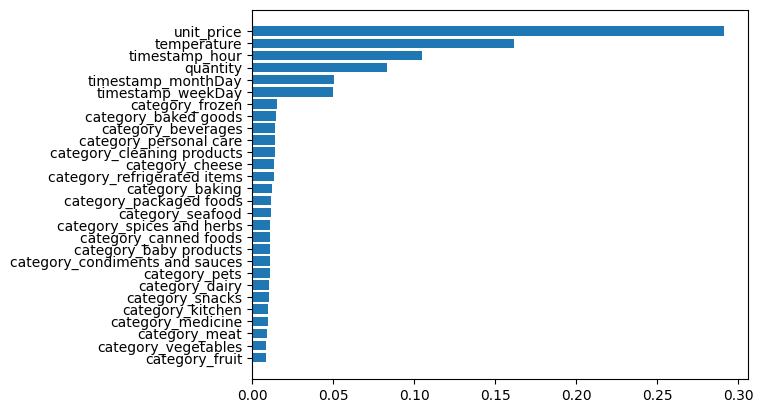

In [103]:
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

<BarContainer object of 2726 artists>

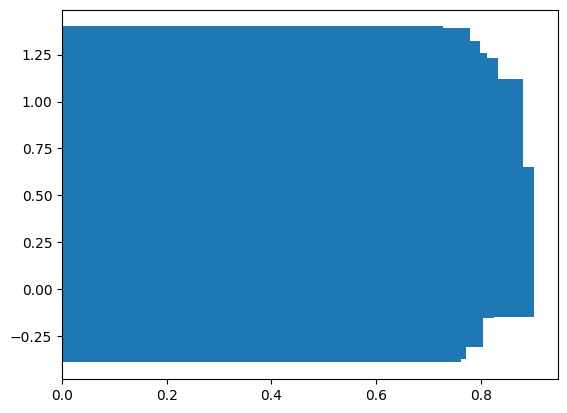

In [96]:
plt.barh(y_test, y_pred)

Text(0, 0.5, 'Y_pred')

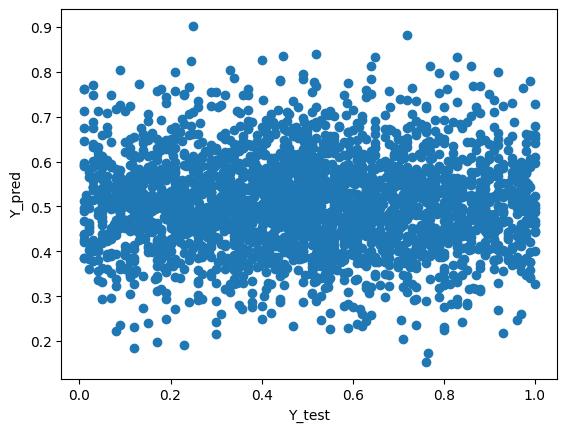

In [93]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

<Axes: >

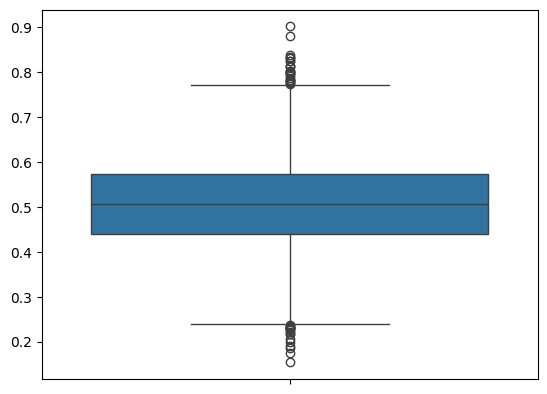

In [106]:
sns.boxplot(y_pred)